In [134]:
import pandas as pd
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Data_Encoding.csv')
data.head(376)

,Word,Count,Noun,Verb,Letter,adjective,morphological,The,diacritic,Outcome
0,إسلام,4.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
1,أسامه,5.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0
2,أسماء,5.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
3,أسيل,4.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
4,أنور,4.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
371,إيهِ,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
372,إليكَ,4.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
373,أمامكَ,5.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
374,أهٍ,2.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


[]

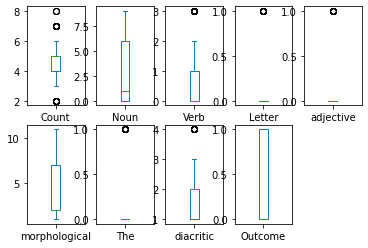

In [21]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Data_Encoding.csv')
data.plot(kind='box',subplots=True,layout=(2,5),sharex=False,sharey=False)
plt.plot()

[]

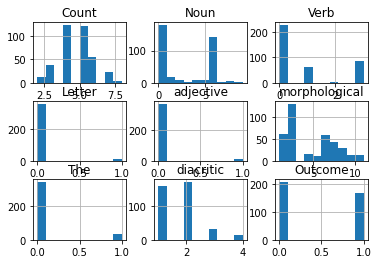

In [22]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Data_Encoding.csv')
data.hist()
plt.plot()

In [60]:
import os
import pefile
import pprint as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
import glob
# import magic
import hashlib
import sys
import struct
import peutils
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
def sha256_checksum(filename, block_size=65536):
    sha256 = hashlib.sha256()
    with open(filename, 'rb') as f:
        for block in iter(lambda: f.read(block_size), b''):
            sha256.update(block)
    return sha256.hexdigest()
    class PEFile:  
       """ 
    This Class is constructed by parsing the pe file for the interesting features
    each pe file is an object by itself and we extract the needed information
    into a dictionary
    """
    def __init__(self, filename):

        self.pe = pefile.PE(filename, fast_load=True)
        
        self.filename = filename      
        self.DebugSize = self.pe.OPTIONAL_HEADER.DATA_DIRECTORY[6].Size
        self.DebugRVA = self.pe.OPTIONAL_HEADER.DATA_DIRECTORY[6].VirtualAddress
        self.ImageVersion = self.pe.OPTIONAL_HEADER.MajorImageVersion
        self.OSVersion = self.pe.OPTIONAL_HEADER.MajorOperatingSystemVersion
        self.ExportRVA = self.pe.OPTIONAL_HEADER.DATA_DIRECTORY[0].VirtualAddress
        self.ExportSize = self.pe.OPTIONAL_HEADER.DATA_DIRECTORY[0].Size
        self.IATRVA = self.pe.OPTIONAL_HEADER.DATA_DIRECTORY[12].VirtualAddress
        self.ResSize = self.pe.OPTIONAL_HEADER.DATA_DIRECTORY[2].Size
        self.LinkerVersion = self.pe.OPTIONAL_HEADER.MajorLinkerVersion
        self.NumberOfSections = self.pe.FILE_HEADER.NumberOfSections
        self.StackReserveSize = self.pe.OPTIONAL_HEADER.SizeOfStackReserve
        self.Dll = self.pe.OPTIONAL_HEADER.DllCharacteristics
        self.AddressOfEntryPoint = self.pe.OPTIONAL_HEADER.AddressOfEntryPoint
        self.ImageBase = self.pe.OPTIONAL_HEADER.ImageBase
        
     
        self.pe.parse_data_directories()
        imported_dll = {}
        number_dll = 0
        try:
            for entry in self.pe.DIRECTORY_ENTRY_IMPORT:
                if entry is not None:
            
                    number_dll += 1
                    for imp in entry.imports:
                     
                        if imp.name is not None:
                          
                            imported_dll[entry.dll.decode()] = imp.name.decode()
        except:
            pass
                        
        self.ImportedDLL = imported_dll
        self.NumberOfImportDLL = number_dll
        
        section_names = {}
        number_sections = 0
        try:
            for section in self.pe.sections:
                number_sections += 1
             
                section_names[section.Name.decode()] = section.SizeOfRawData
            self.SectionNames = section_names
            self.NumberOfSections = number_sections
        except:
            pass
            
        number_import_functions = 0
        import_function = []
        
        try:
            if self.pe.OPTIONAL_HEADER.DATA_DIRECTORY[pefile.DIRECTORY_ENTRY['IMAGE_DIRECTORY_ENTRY_IMPORT']].VirtualAddress != 0:
                self.pe.parse_data_directories(directories=[pefile.DIRECTORY_ENTRY['IMAGE_DIRECTORY_ENTRY_IMPORT']])
                for entry in self.pe.DIRECTORY_ENTRY_IMPORT:
                    for imp in entry.imports:
                      
                        if imp.name:
                            number_import_functions += 1
                            import_function.append(imp.name.decode())
        except:
            pass
            
        self.NumberOfImportFunctions = number_import_functions
        self.ImportedFunctions = import_function
        
def Construct(self):
        sample = {}

        for attr, k in self.__dict__.items():
            if(attr != "pe"):
                sample[attr] = k
        return sample
def pe2vec(directory):
    """
    dirty function (handling all exceptions) for each sample
    it construct a dictionary of dictionaries in the format:
    sample x : pe informations
    """
    dataset = {}
    #directory = "./data/"
    print("")
    print("[*] Extracting the PE file data: ")
    print("")
    for subdir, dirs, files in os.walk(directory):
        for f in files:
            file_path = os.path.join(subdir, f)
            
            #print(magic.from_file(file_path))
            if re.match('^PE.*', magic.from_file(file_path)):
                try:
                    #print("[+] "+file_path)
                    pe = PEFile(file_path)
                    dataset[str(f)] = pe.Construct()
                except Exception as e:
                    raise
            else:
                #print()
                #print("[-] File not PE: "+file_path+" \n=>\t "+magic.from_file(file_path))
                #print()
                #print("Removing file.")
                os.remove(file_path)
    return dataset
for subdir, dirs, files in os.walk("./data/malware/"):
        for f in files:
            #print(f)
            os.rename("./data/malware/"+f, "./data/malware/"+sha256_checksum("./data/malware/"+f))
            
print("Done Renaming files to sha256")    
ds_malware = {}
ds_malware = pe2vec("./data/malware")
print("")
print("[*] Malware PE information:")
print("")
#pp.pprint(ds_malware)
for subdir, dirs, files in os.walk("./data/clean/"):
        for f in files:
            #print(f)
            os.rename("./data/clean/"+f, "./data/clean/"+sha256_checksum("./data/clean/"+f))

print("Done Renaming files to sha256")
ds_clean = {}
ds_clean = pe2vec("./data/clean")
print("")
print("[*] Clean PE information:")
print("")
#pp.pprint(ds_clean)

print("")
print("[*] Completed Clean PE information extraction:")
print("")
def vec2csv(dataset, output_file):
    df = pd.DataFrame(dataset)
    test_data = df.transpose()  # transpose to have the features as columns and samples as rows
# utf-8 is prefered 
#output_file = './output/dataset.csv'
    test_data.to_csv(output_file,sep=',', encoding='utf-8')
    print("")
    print("[+] Saving file to: " + output_file)
    print("")
datasetOutput_malware = "/Arabic_Words.csv"
vec2csv(ds_malware, datasetOutput_malware)

datasetOutput_clean = "./output/dataset_clean.csv"
vec2csv(ds_clean, datasetOutput_clean)    

print("")
print("[*] Completed Malware PE information extraction:")
print("")
df_malware = pd.read_csv("/Arabic_Words.csv")
df_malware.shape
df_malware.head(5)
    

Done Renaming files to sha256

[*] Extracting the PE file data: 


[*] Malware PE information:

Done Renaming files to sha256

[*] Extracting the PE file data: 


[*] Clean PE information:


[*] Completed Clean PE information extraction:


[+] Saving file to: Arabic_Words.csv



FileNotFoundError: [Errno 2] No such file or directory: './output/dataset_clean.csv'

In [15]:
import datetime
start_time = datetime.datetime.now()
print("Started at ", start_time)

Started at  2021-12-24 18:57:07.809164


In [161]:
import pandas as pd
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Data_Encoding.csv')
print(data.Word.head(376))

0       إسلام
1       أسامه
2       أسماء
3        أسيل
4        أنور
        ...  
371      إيهِ
372     إليكَ
373    أمامكَ
374       أهٍ
375      أواه
Name: Word, Length: 376, dtype: object


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Arabic_Words.csv')

In [135]:
import pandas as pd
import numpy as np
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Data_Encoding.csv')
df = pd.DataFrame(data, columns= ['Outcome'])
df.head(376 )
#print (df)

,Outcome
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
371,0.0
372,0.0
373,0.0
374,0.0


In [142]:
import pandas as pd
import numpy as np
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Data_Encoding.csv')
df = pd.DataFrame(data, columns= ['Outcome'])
df.set_index('Outcome').head(376)

""
Outcome
0.0
0.0
0.0
0.0
0.0
...
0.0
0.0
0.0


In [148]:
df.describe().head(376)

,Outcome
count,471
unique,2
top,False
freq,264


In [144]:
import pandas as pd
import numpy as np
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Data_Encoding.csv')
df = pd.DataFrame(data, columns= ['Outcome'])
condition = df['Outcome'] == 1
df[condition].head(376)

,Outcome
30,1.0
31,1.0
32,1.0
33,1.0
34,1.0
...,...
346,1.0
347,1.0
348,1.0
349,1.0


In [140]:
import pandas as pd
import numpy as np
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Data_Encoding.csv')
df = pd.DataFrame(data, columns= ['Outcome']) ==1
df.groupby(df['Outcome']).head(376).sum()

Outcome    169
dtype: int64

In [145]:
import pandas as pd
import numpy as np
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Data_Encoding.csv')
df = pd.DataFrame(data, columns= ['Outcome'])
condition = df['Outcome'] == 0.0
df[condition].head(376)



,Outcome
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
371,0.0
372,0.0
373,0.0
374,0.0


In [146]:
import pandas as pd
import numpy as np
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Data_Encoding.csv')
df = pd.DataFrame(data, columns= ['Outcome']) ==0 
df.groupby(df['Outcome']).head(376).sum()

Outcome    207
dtype: int64

In [149]:
import pandas as pd
import numpy as np
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Data_Encoding.csv')
data.sort_values(by='Count').head(376 )


,Word,Count,Noun,Verb,Letter,adjective,morphological,The,diacritic,Outcome
313,أنْ,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
314,أن,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
312,إنَ,2.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0
59,إذ,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
374,أهٍ,2.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
24,أفريقيا,7.0,8.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
252,استغفار,7.0,3.0,0.0,0.0,0.0,9.0,0.0,2.0,1.0
348,السماوات,8.0,6.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0
230,أستراليا,8.0,8.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0


In [150]:
import pandas as pd
import numpy as np
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Arabic_Words.csv')
data.sort_values(by='Count').head(376 )


,Word,Count,Noun,Verb,Letter,adjective,morphological,The,diacritic,Outcome
313,661a568b46bcb7b24fe4232e3a201b14c1903b8c394db9...,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
314,9216dd4a2f0b1115ae30f8f99069e5f9f37ffcbfcab0a7...,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
312,3d278a63ff49d322a91e51f3191a027458743828c1f620...,2.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0
59,519e7e53fa9f4d008d93b620b86fdf0badd3824b2b1733...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
374,ca275a27a116ff0e38aa5826c53e6c69bf57a3ee839b26...,2.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
24,0a864599c8d2b16bd3c924f64404e7d5011ffe1257f2e1...,7.0,8.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
252,ed94570f5b45a265e15198f9b0a7e46f9aa1e745780b2c...,7.0,3.0,0.0,0.0,0.0,9.0,0.0,2.0,1.0
348,5b527c5c95f1a4d79d1452bae4e7d741caf107b61f9544...,8.0,6.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0
230,a6aa15dc08ec4a63121e64678087d91d4fe5966d445e7f...,8.0,8.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0


In [175]:
import sweetviz,pandas as pd
import numpy as np
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Arabic_Words.csv')
data.head(376 )
my_Report = sweetviz.analyze([data.head(376),"Data_Of_Arabic_Words"])
my_Report.show_html('Report.html')
data.head(376 )

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


,Word,Count,Noun,Verb,Letter,adjective,morphological,The,diacritic,Outcome
0,8e117a32510d41082681de68937befd3f564c349067ec5...,4.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
1,b401e637ead22b50ca3012befa3c55901d2248781750ed...,5.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0
2,c2132540fedae6dba455d57553753448f7685171ac60dd...,5.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
3,f0993ec4ddf41ffe8b87ecd35fa09be5a7d56ab0424875...,4.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
4,3fa07d2ebd61fb0384890778f359a7c873fc429d18a71b...,4.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
371,361c39212c58502882ea5e053143ecff7601344241a2db...,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
372,42bce38dbdd06fbcf6160676d26b2930bba39257f798c8...,4.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
373,6cdb0f2fed6538524c382826bf80dd166c67a4992f10f6...,5.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
374,ca275a27a116ff0e38aa5826c53e6c69bf57a3ee839b26...,2.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [152]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Arabic_Words.csv')
Cor = data.corr().abs()
upper = Cor.where(np.triu(np.ones(Cor.shape),k=0).astype(np.bool))
print(upper.head(376),"\n") 

#print(Cor)

               Count      Noun      Verb    Letter  adjective  morphological  \
Count            1.0  0.273506  0.040449  0.275464   0.050253       0.472810   
Noun             NaN  1.000000  0.668437  0.165126   0.114964       0.124209   
Verb             NaN       NaN  1.000000  0.143876   0.128156       0.092737   
Letter           NaN       NaN       NaN  1.000000   0.037011       0.215231   
adjective        NaN       NaN       NaN       NaN   1.000000       0.084649   
morphological    NaN       NaN       NaN       NaN        NaN       1.000000   
The              NaN       NaN       NaN       NaN        NaN            NaN   
diacritic        NaN       NaN       NaN       NaN        NaN            NaN   
Outcome          NaN       NaN       NaN       NaN        NaN            NaN   

                    The  diacritic   Outcome  
Count          0.255007   0.092353  0.428777  
Noun           0.292224   0.086619  0.180215  
Verb           0.229673   0.069620  0.398139  
Letter     

In [154]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Arabic_Words.csv')
Cor = data.corr()["Outcome"][:-1].abs()
print(Cor)

Count            0.428777
Noun             0.180215
Verb             0.398139
Letter           0.156865
adjective        0.133641
morphological    0.306152
The              0.287443
diacritic        0.072828
Name: Outcome, dtype: float64


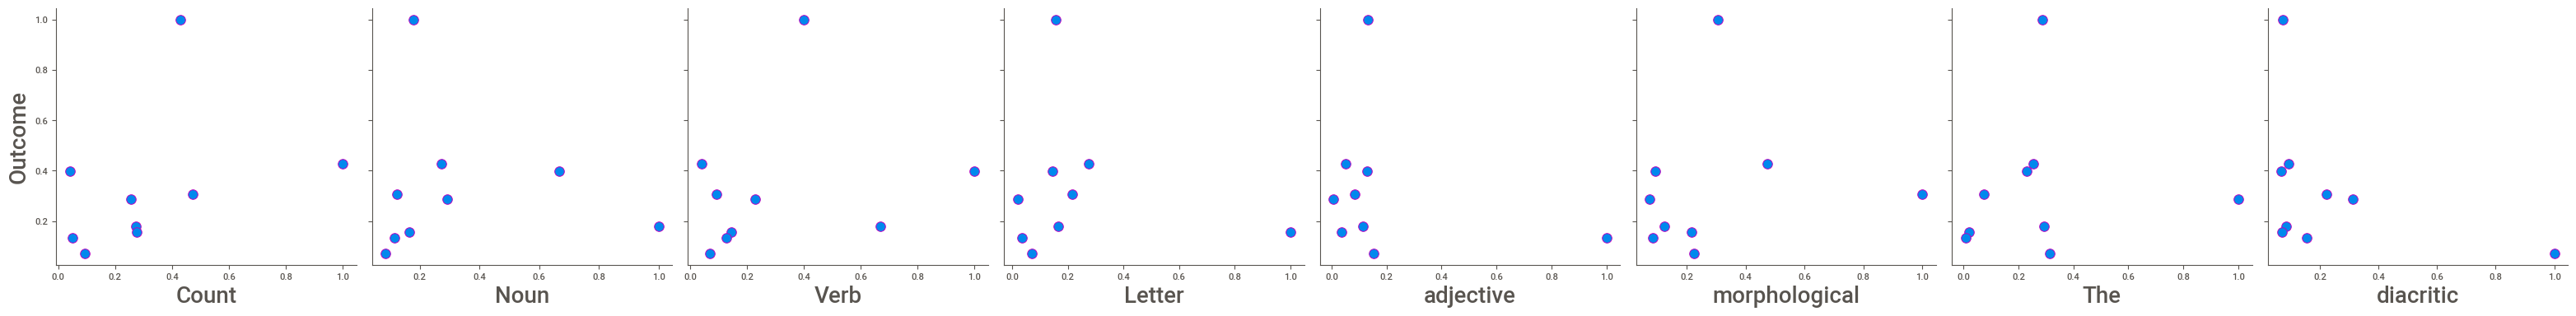

In [170]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Arabic_Words.csv')
df = pd.DataFrame(data)
Cor = df.corr().abs()
for i in range(0 , len(Cor.columns)>=1):
    sns.pairplot(Cor , y_vars=['Outcome'],x_vars=Cor.columns[i:i+8] ,plot_kws = {'alpha': 1, 's': 70, 'edgecolor': 'm'}, size = 4)


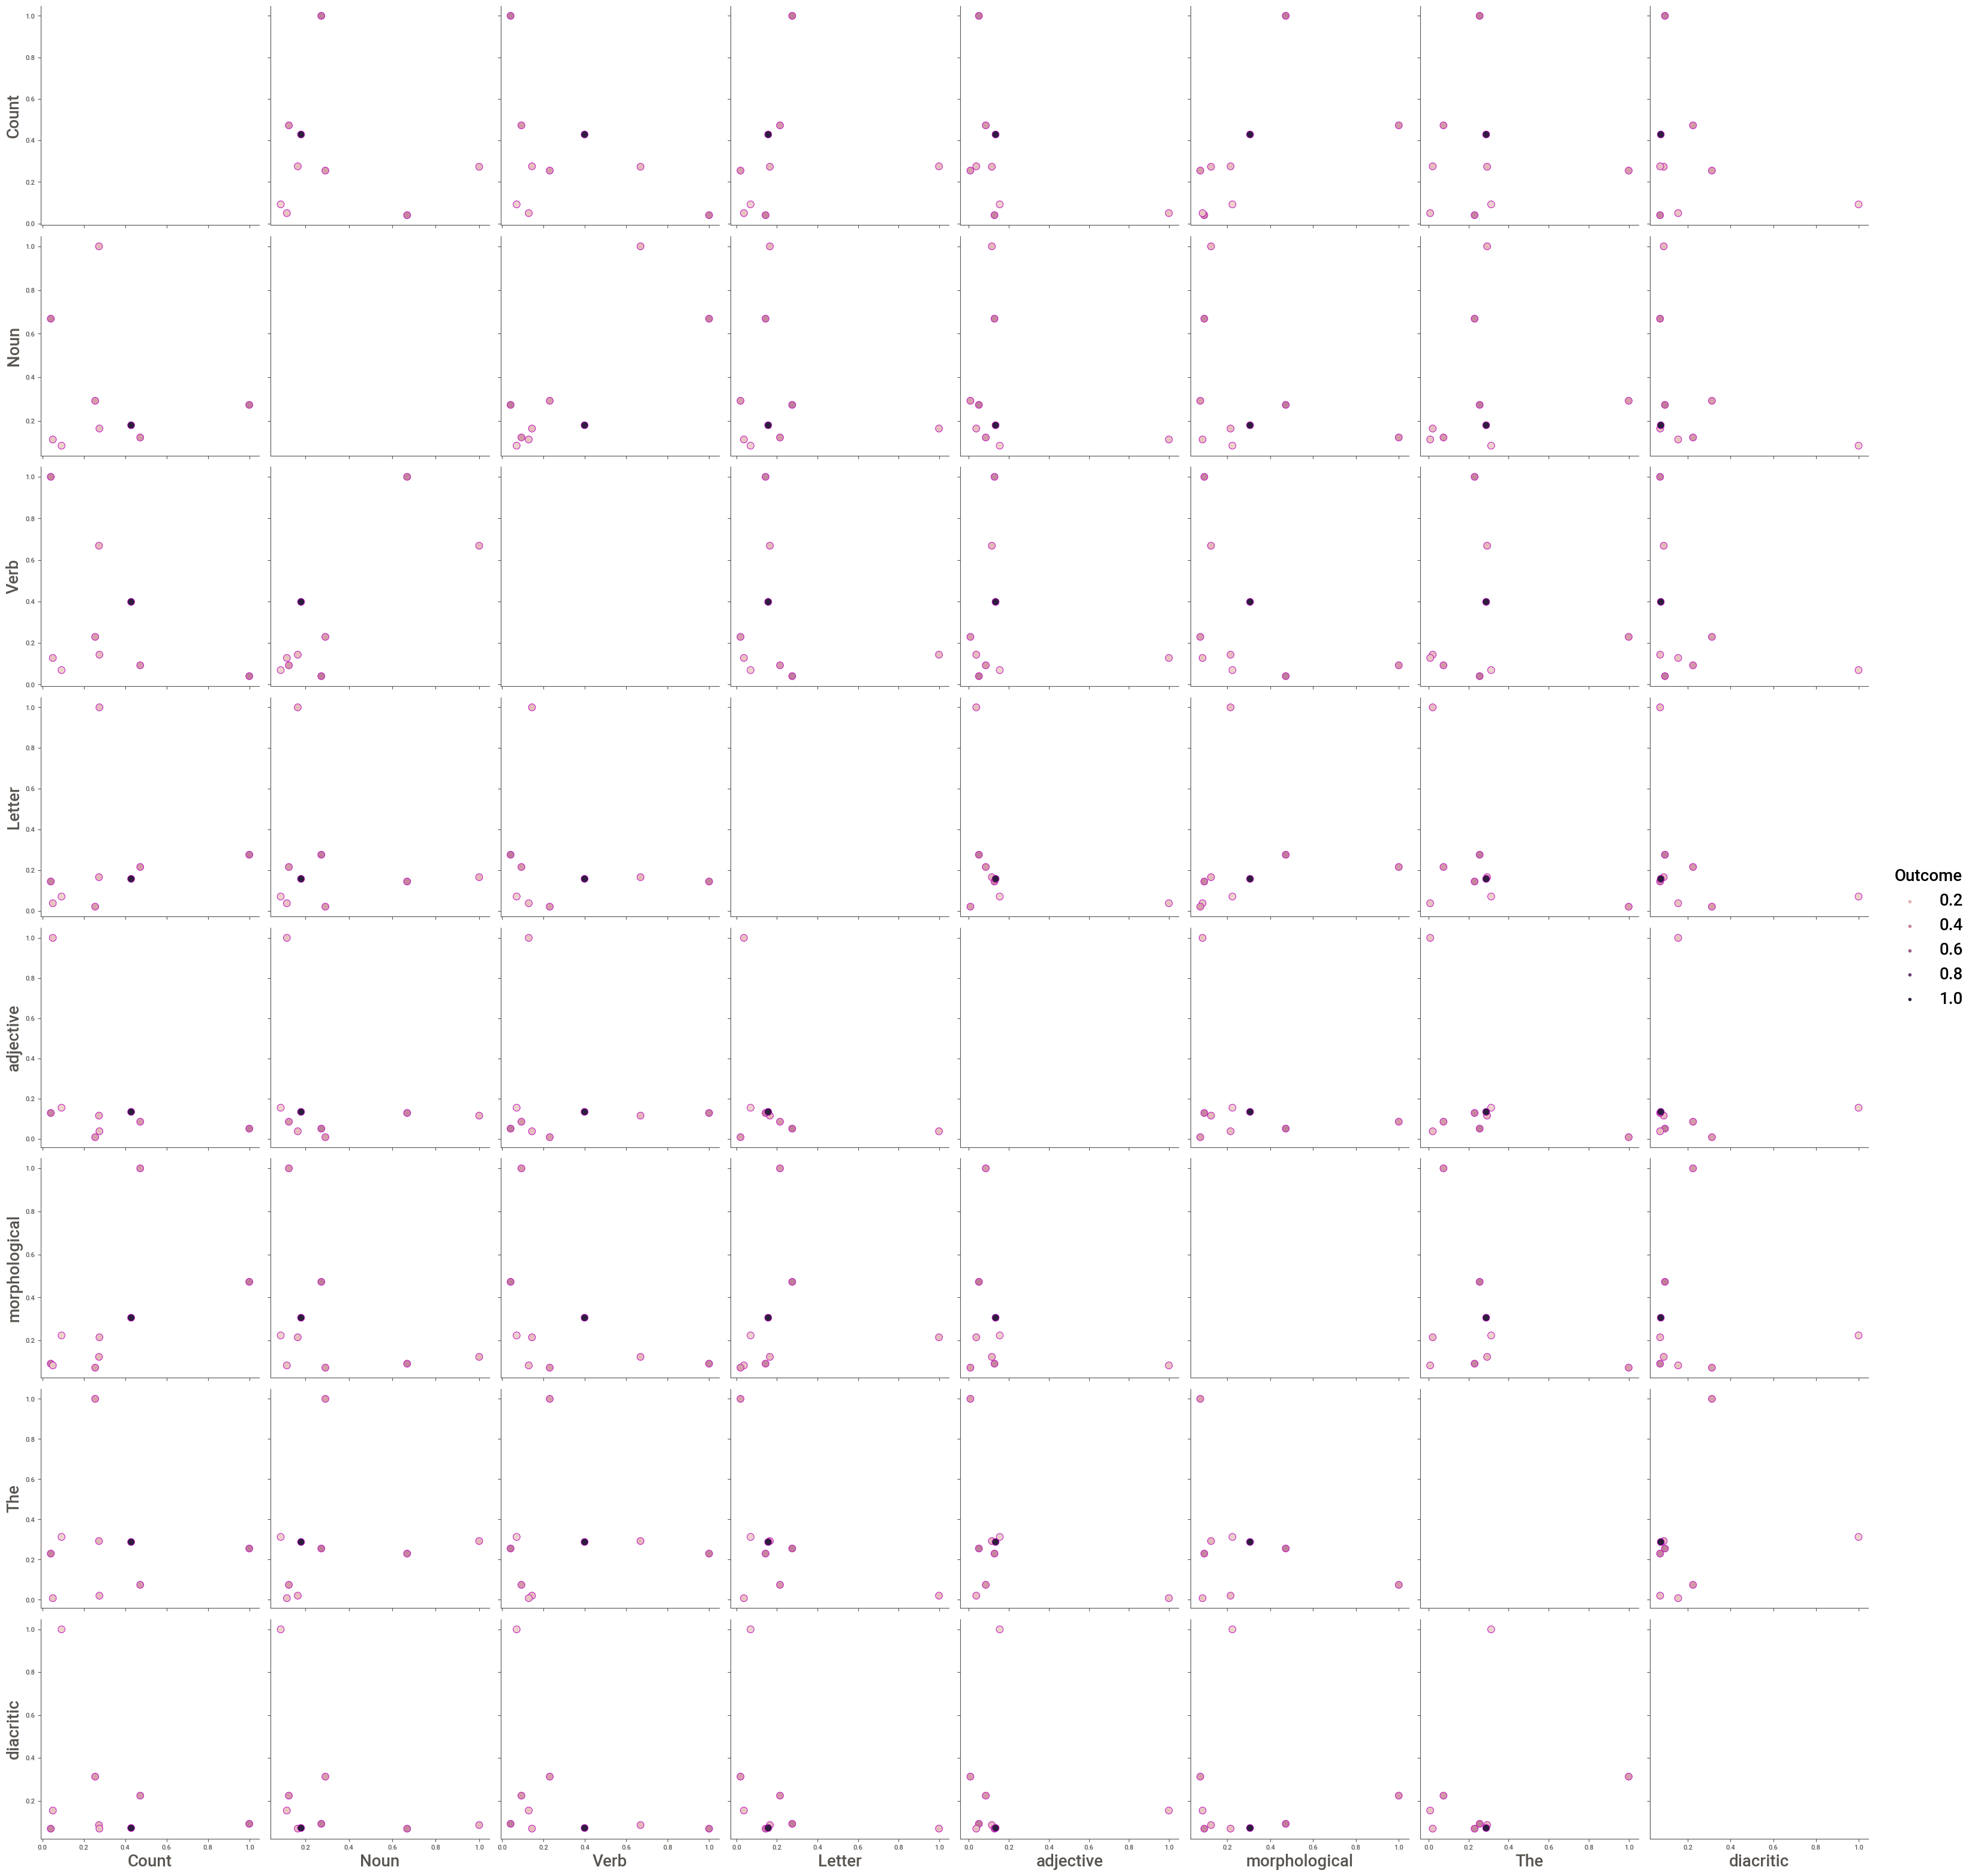

In [171]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Arabic_Words.csv')
df = pd.DataFrame(data)
Cor = df.corr().abs()
matplotlib.rcParams['font.size'] = 20
sns.pairplot(Cor, hue = 'Outcome',plot_kws = {'alpha': 1, 's': 70, 'edgecolor': 'm'},size=4);

In [159]:
import pandas as pd
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Arabic_Words.csv')
print(data.Word.head(376))

0      8e117a32510d41082681de68937befd3f564c349067ec5...
1      b401e637ead22b50ca3012befa3c55901d2248781750ed...
2      c2132540fedae6dba455d57553753448f7685171ac60dd...
3      f0993ec4ddf41ffe8b87ecd35fa09be5a7d56ab0424875...
4      3fa07d2ebd61fb0384890778f359a7c873fc429d18a71b...
                             ...                        
371    361c39212c58502882ea5e053143ecff7601344241a2db...
372    42bce38dbdd06fbcf6160676d26b2930bba39257f798c8...
373    6cdb0f2fed6538524c382826bf80dd166c67a4992f10f6...
374    ca275a27a116ff0e38aa5826c53e6c69bf57a3ee839b26...
375    8fe1ca77fcae9c127ec564803dfbb5948331f1ab697b99...
Name: Word, Length: 376, dtype: object


(     Outcome
 0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
 ..       ...
 371      0.0
 372      0.0
 373      0.0
 374      0.0
 375      0.0
 
 [207 rows x 1 columns],
      Outcome
 30       1.0
 31       1.0
 32       1.0
 33       1.0
 34       1.0
 ..       ...
 346      1.0
 347      1.0
 348      1.0
 349      1.0
 350      1.0
 
 [169 rows x 1 columns])

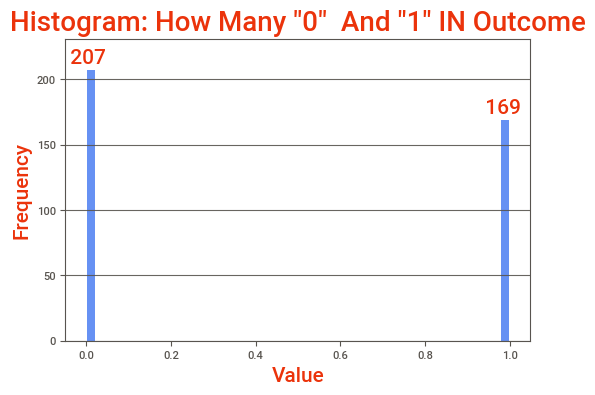

In [172]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Arabic_Words.csv')
df = pd.DataFrame(data, columns= ['Outcome'])
n, bins, patches = plt.hist(df, bins=45, color='#2563EE',alpha=0.7, rwidth=0.9)
plt.grid(axis='y', alpha=0.9)
plt.xlabel('Value',color='#EB330B',size=15)
plt.ylabel('Frequency',color='#EB330B',size=15)
plt.title('Histogram: How Many "0"  And "1" IN Outcome',color='#EB330B',size=20)
plt.text(-0.05, 212, r' 207 ',color='#EB330B',size=15)
plt.text(0.93, 174, r' 169',color='#EB330B',size=15)
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 11 if maxfreq % 10 else maxfreq + 10)
condition = df['Outcome'] == 0;condition1 = df['Outcome'] == 1
df[condition].head(376),df[condition1].head(376)

<AxesSubplot:>

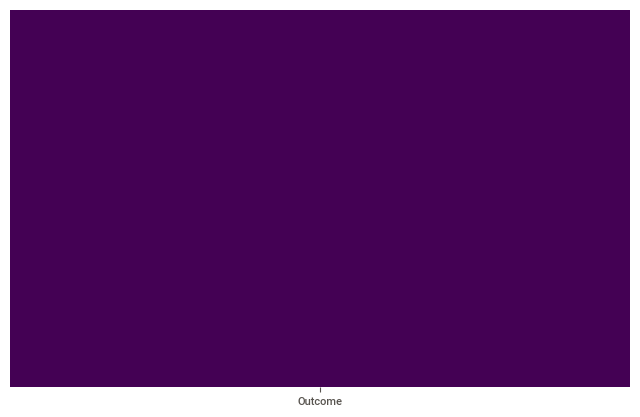

In [173]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sys
import seaborn as sns
data = pd.read_csv (r'C:\Users\nizar.maarouf\Desktop\project2021\Arabic_Words.csv')
plt.subplots(figsize=(8,5))
sns.heatmap(df.isnull().head(376), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

In [167]:
import csv
File = open('Arabic_Words.csv')
Reader = csv.reader(File)
Data = list(Reader)
for data in Data:
    if((data) != ['', '', '', '', '', '', '', '', '', '']):
       print(data)
    
File.close()  

['ן»¿Word', 'Count', 'Noun', 'Verb', 'Letter', 'adjective', 'morphological', 'The', 'diacritic', 'Outcome']
['8e117a32510d41082681de68937befd3f564c349067ec55136e0cbfd08f477b8', '4', '1', '0', '0', '0', '2', '0', '2', '0']
['b401e637ead22b50ca3012befa3c55901d2248781750edb463802662103a0e12', '5', '1', '0', '0', '0', '2', '0', '3', '0']
['c2132540fedae6dba455d57553753448f7685171ac60dd64be0e691c16afff2c', '5', '1', '0', '0', '0', '2', '0', '1', '0']
['f0993ec4ddf41ffe8b87ecd35fa09be5a7d56ab0424875a1e9c9002206793321', '4', '1', '0', '0', '0', '2', '0', '1', '0']
['3fa07d2ebd61fb0384890778f359a7c873fc429d18a71bc6ad10f9fee2d080b3', '4', '1', '0', '0', '0', '2', '0', '1', '0']
['50faa6a497e42d511ba571d20f5f1ceb122578eab3d7a756065298f19356fcda', '5', '1', '0', '0', '0', '2', '0', '1', '0']
['6423ea67803e7caa19c41298bed41a265b9900e757ad3395b9f804a5305f94fb', '2', '3', '0', '0', '0', '2', '0', '1', '0']
['244a9f5147173bd1a9be0053d4183daf092d9ab817a6c6dfc0bf39064bc25ad3', '2', '6', '0', '0', '0', 